## **Importing** **packages**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
from sklearn.svm import SVC, NuSVC
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from scipy import stats
from scipy.stats import uniform, randint
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy import interp
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from keras.utils import to_categorical
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

### **Dataset description**


In [ ]:
data=pd.read_csv("diabetes.csv")

In [ ]:
data.head(n=6)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0

In [ ]:
data = pd.DataFrame({'F1':data.iloc[:,:8].values[:,0],
                     'F2':data.iloc[:,:8].values[:,1],
                     'F3':data.iloc[:,:8].values[:,2],
                     'F4':data.iloc[:,:8].values[:,3],
                     'F5':data.iloc[:,:8].values[:,4],
                     'F6':data.iloc[:,:8].values[:,5],
                     'F7':data.iloc[:,:8].values[:,6],
                     'F8':data.iloc[:,:8].values[:,7],
                     'Outcome':data.iloc[:,8:].values[:,0]})
data

F1     F2    F3    F4     F5    F6     F7    F8  Outcome
0     6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0        1
1     1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0        0
2     8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0        1
3     1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0        0
4     0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0        1
..    ...    ...   ...   ...    ...   ...    ...   ...      ...
763  10.0  101.0  76.0  48.0  180.0  32.9  0.171  63.0        0
764   2.0  122.0  70.0  27.0    0.0  36.8  0.340  27.0        0
765   5.0  121.0  72.0  23.0  112.0  26.2  0.245  30.0        0
766   1.0  126.0  60.0   0.0    0.0  30.1  0.349  47.0        1
767   1.0   93.0  70.0  31.0    0.0  30.4  0.315  23.0        0

[768 rows x 9 columns]

In [ ]:
data.describe()

F1          F2          F3          F4          F5          F6  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

               F7          F8     Outcome  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

## **Plotting** **graphs**

In [ ]:
Renamed_feature= []               
all_clf_res=[]                    
random_initializer=20           
n_dots=50

for i in range(8): 
  Renamed_feature.append('F'+str(i+1)) 


def pair_plot(data):
  plt.figure()
  
  pair_plot =sns.pairplot(data=data,            
                          height=3,
                          hue='Outcome',  
                          diag_kind='kde')
  pair_plot.fig.suptitle("Pairplot of all features")
  plt.show()

def Box_Gaussian(data):

  fig=plt.figure(figsize=(15,6))                                
  fig.suptitle("Box Gaussian plot of all features")
  
  n_scaler = preprocessing.StandardScaler()                
  temp_Data = n_scaler.fit_transform(data)                  
  for i in range(8):                                        
    
    plt.subplot(2, 4, i+1)                                  
    Data = temp_Data[:,i]                                   
    sns.kdeplot(Data, shade=True,color='red', alpha=0.3)    
    ax = sns.boxplot(Data, saturation=0.9, color="green")   
    plt.gca().invert_yaxis()                                
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])                    
    plt.ylim((-0.5,0.65))                                   
    plt.tight_layout()                                      
    
    for patch in ax.artists:
      r, g, b, a = patch.get_facecolor()                     
      patch.set_facecolor((r, g, b, 0.3))                   


def plot_confusionMatrix(data):
  sns.set(font_scale=1.15)                                   
  ax = plt.figure(figsize=(10, 8))                            
  plt.title("Confusion Matrix of all features")
  sns.heatmap(data.corr(),                                    
              vmax=1.0,                                       
                                                              
              vmin=0.0,
              linewidths=0.01,
              square=False,                                   
              annot=True,                                      
              linecolor="black")                                      
                                                              
  b, t = plt.ylim()                                           
  b += 0.5                                                    
  t -= 0.5                                                   
  plt.ylim(b, t)                                             

def dist_Plot(data):
 
  fig, ax = plt.subplots(2,4, figsize=(12,5))                 
  sns.distplot(data.F1, bins = 10, ax=ax[0,0])                
  sns.distplot(data.F2, bins = 10, ax=ax[0,1]) 
  sns.distplot(data.F3, bins = 10, ax=ax[0,2]) 
  sns.distplot(data.F4, bins = 10, ax=ax[0,3])
  sns.distplot(data.F5, bins = 10, ax=ax[1,0]) 
  sns.distplot(data.F6, bins = 10, ax=ax[1,1]) 
  sns.distplot(data.F7, bins = 10, ax=ax[1,2]) 
  sns.distplot(data.F8, bins = 10, ax=ax[1,3]) 
  fig.suptitle("Gaussian Distribution of all features")
  fig.tight_layout()                                          

def plot_violinplot (data):

  fig, ax = plt.subplots(2,4, figsize=(12,6))          
  sns.set()
  sns.violinplot(x = data.Outcome, y=data.F1,  ax=ax[0,0])    
  sns.violinplot(x = data.Outcome, y=data.F2,  ax=ax[0,1])     
  sns.violinplot(x = data.Outcome, y=data.F3,  ax=ax[0,2])    
  sns.violinplot(x = data.Outcome, y=data.F4,  ax=ax[0,3])   
  sns.violinplot(x = data.Outcome, y=data.F5,  ax=ax[1,0])     
  sns.violinplot(x = data.Outcome, y=data.F6,  ax=ax[1,1])    
  sns.violinplot(x = data.Outcome, y=data.F7,  ax=ax[1,2])    
  sns.violinplot(x = data.Outcome, y=data.F8,  ax=ax[1,3])    
  fig.suptitle("Violin plot of all features")
  fig.tight_layout()



def data_plot (data,
               Pair_plot,
               Dist_Plot,
               Plot_violinplot,
               Plot_confusionMatrix,
               box_Gaussian):
  
  if Pair_plot ==True:
    pair_plot(data)

  if Dist_Plot ==True:
    dist_Plot(data)

  if Plot_violinplot ==True:
    plot_violinplot (data)

  if Plot_confusionMatrix ==True:
    plot_confusionMatrix(data)

  if box_Gaussian ==True:
    Box_Gaussian(data)

    

<Figure size 640x480 with 0 Axes>

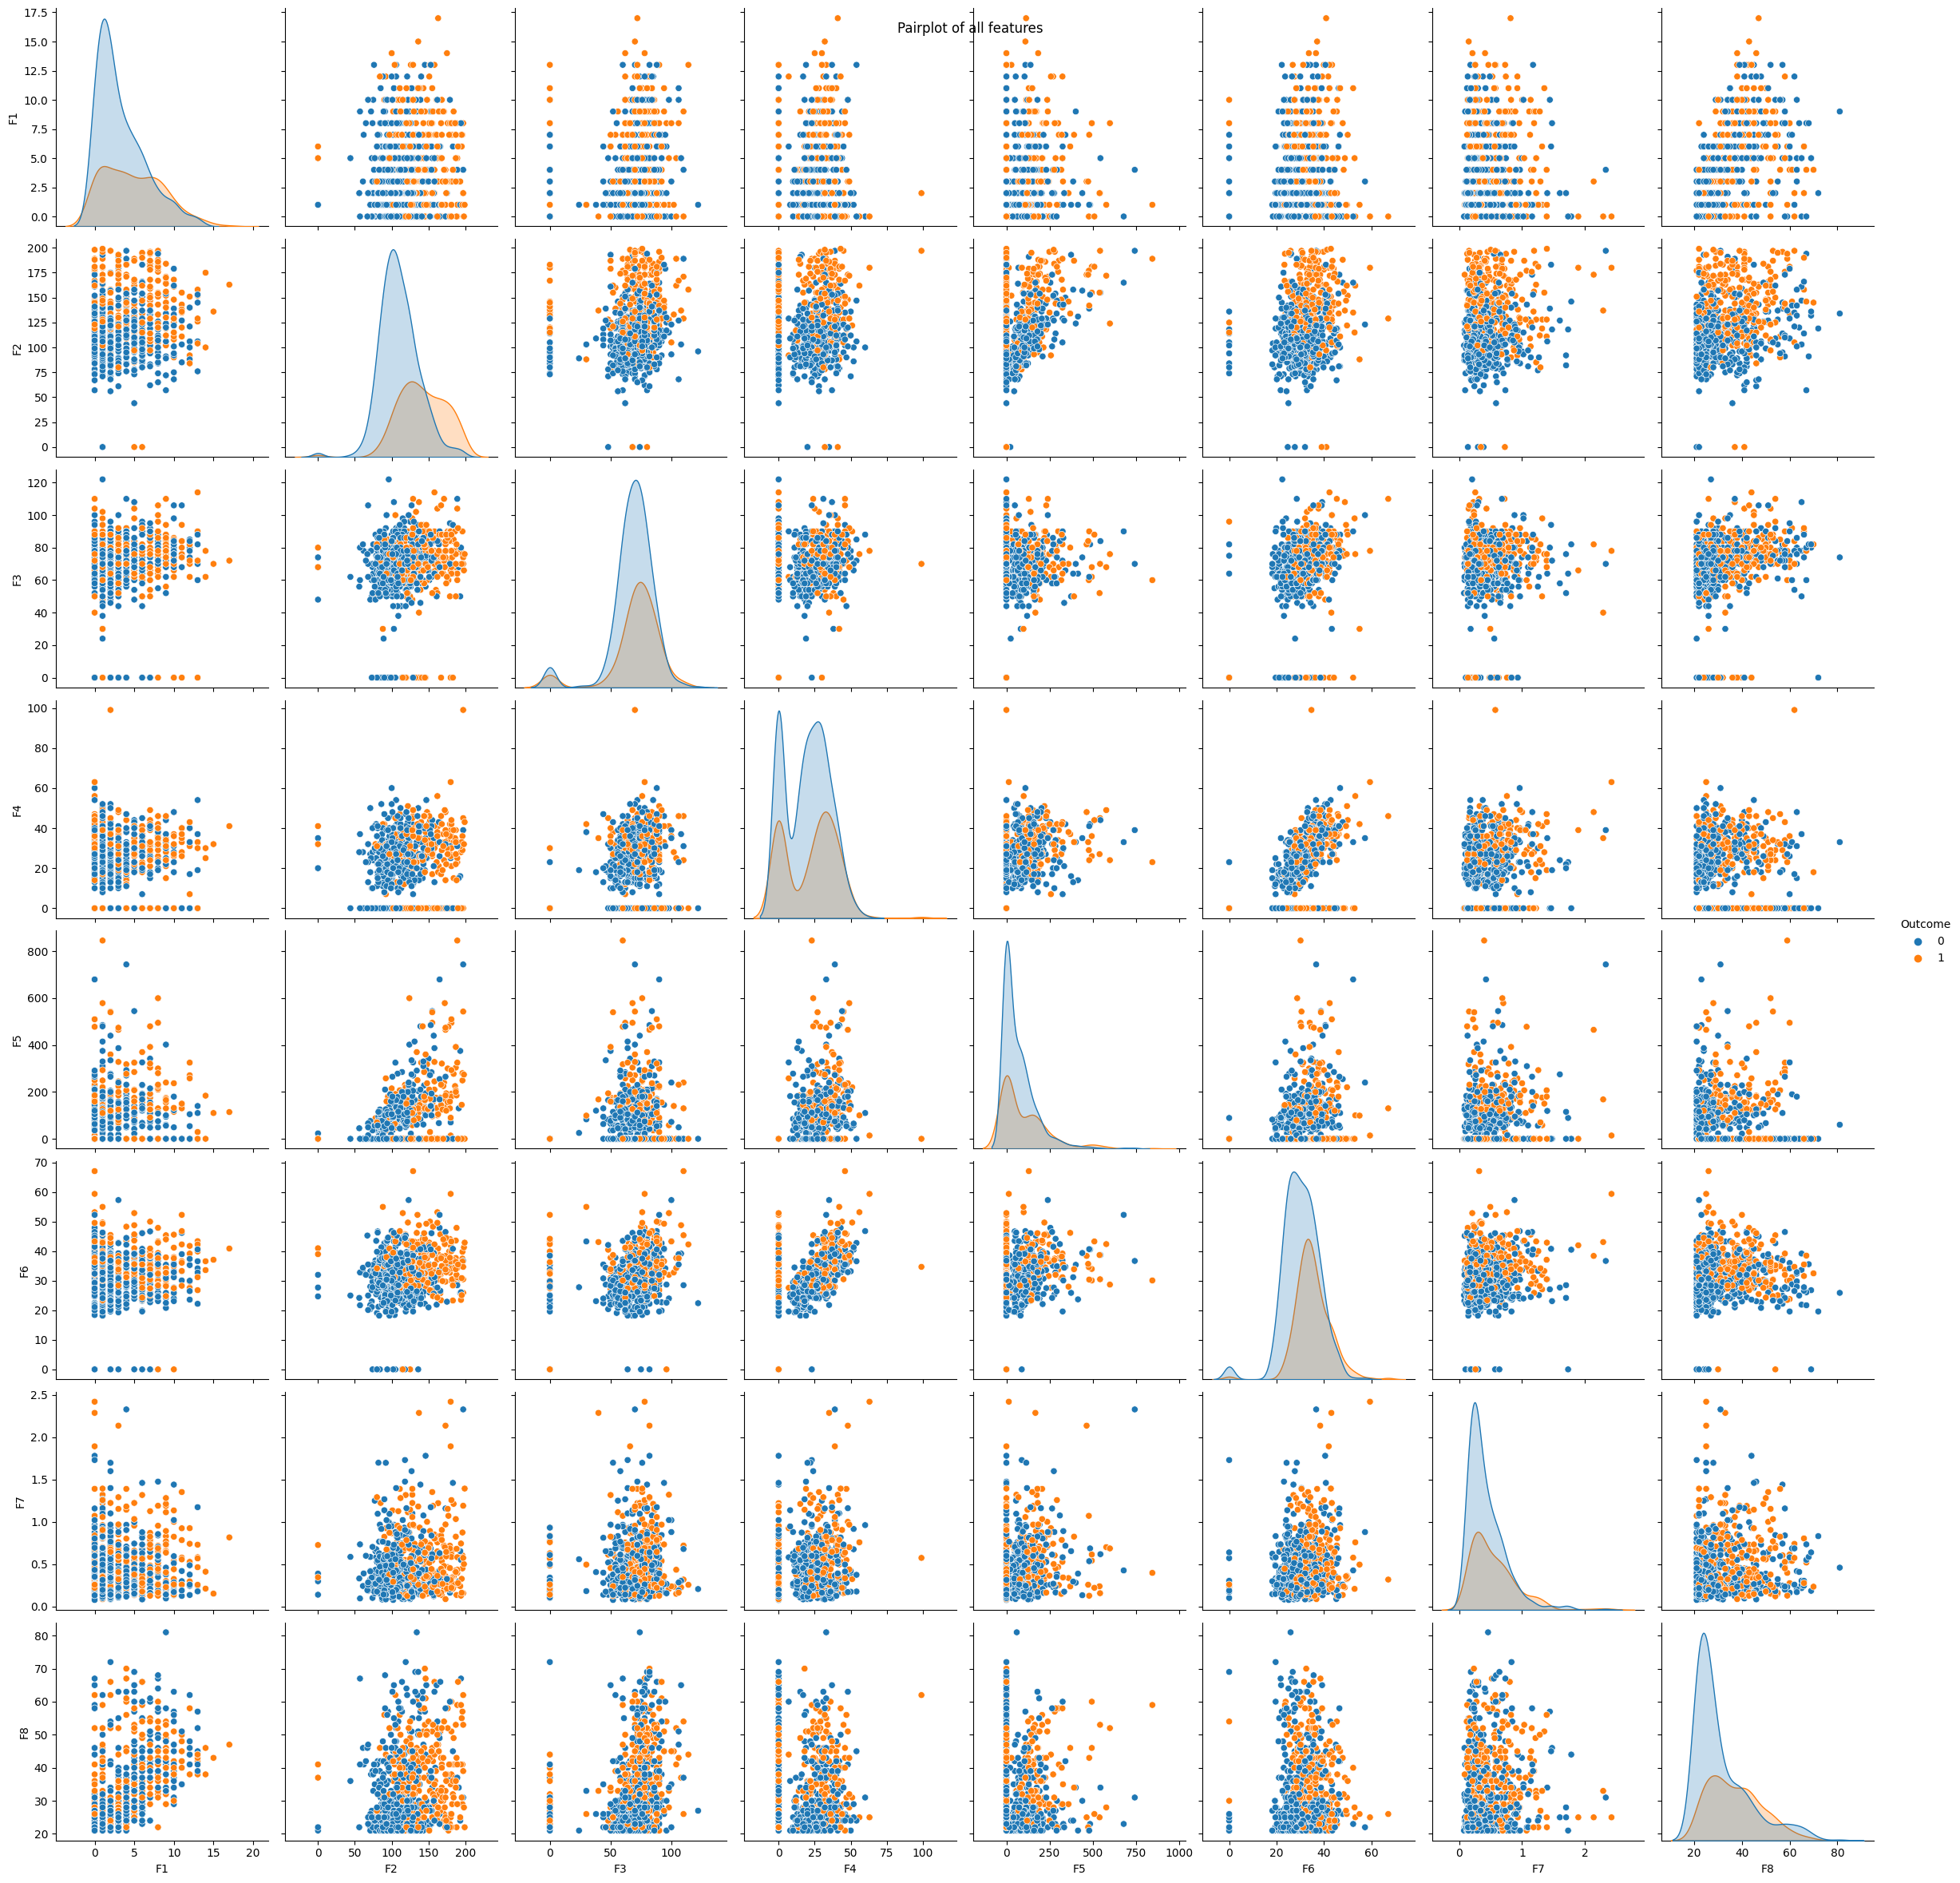

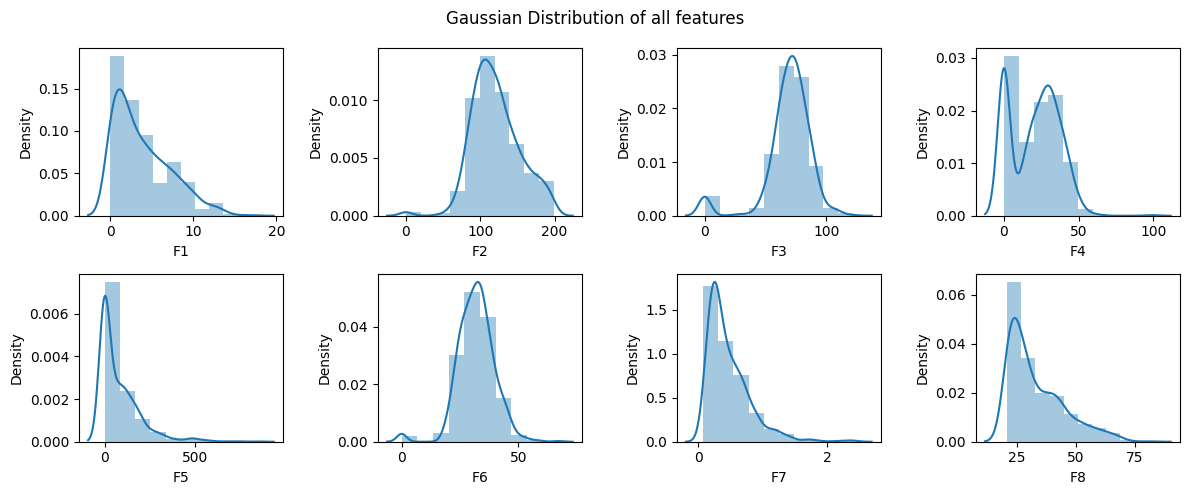

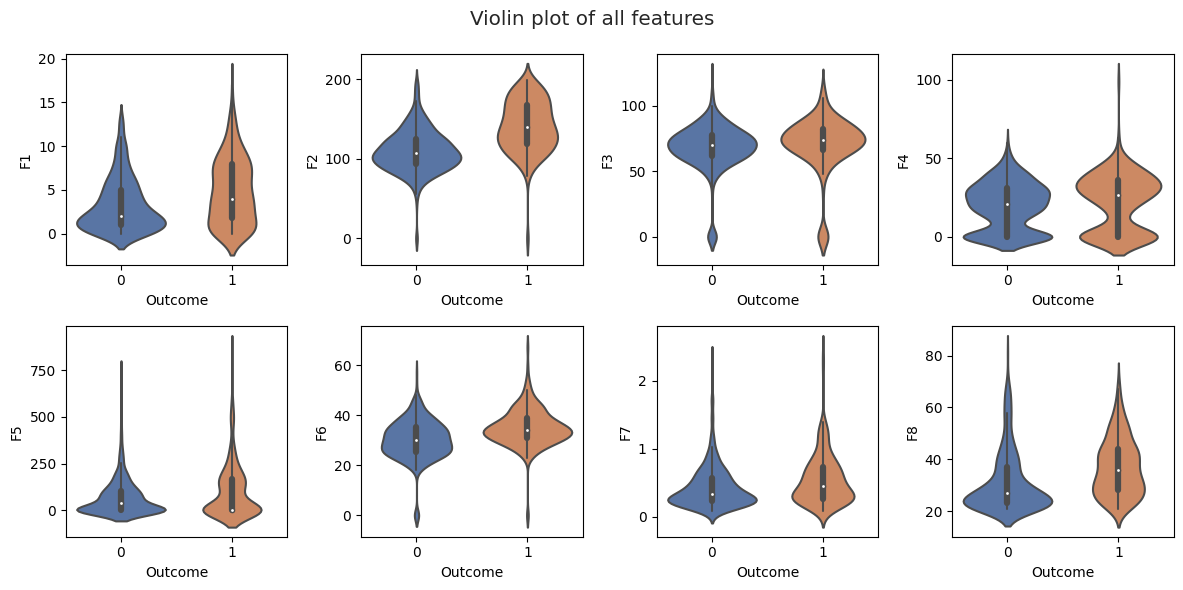

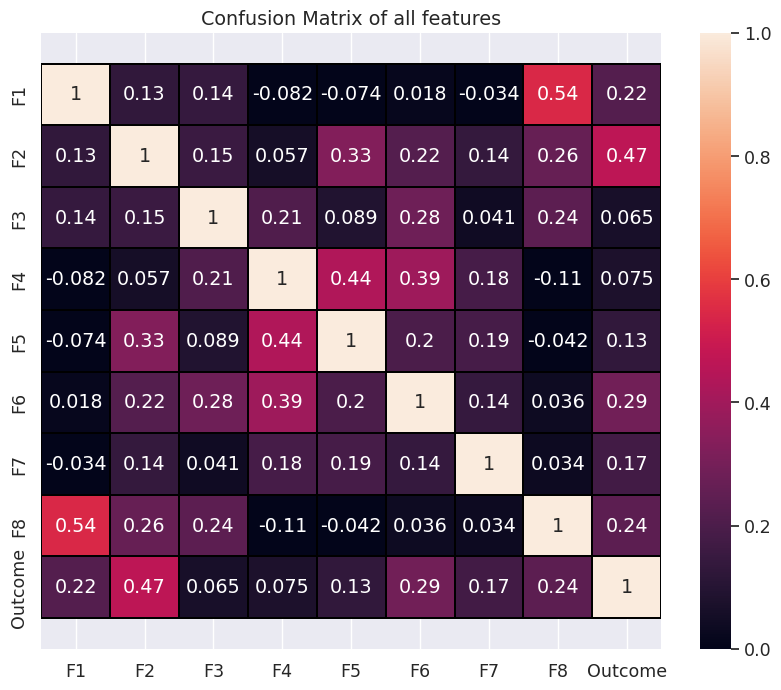

In [ ]:
data_plot (data,
          Pair_plot=True,
          Dist_Plot=True,
          Plot_violinplot=True,
          Plot_confusionMatrix=True,
          box_Gaussian=False)

## **Data Preprocessing**

In [ ]:
def Manual (data):

    max_Pregnancies = data.F1.max()                         
    data = data[data.F1!=max_Pregnancies]                   
    max_Glucose = data.F2.max()                            
    data = data[data.F2!=max_Glucose]                       
    for i in range(4):                                      
      min_Glucose = data.F2.min()                           
      data = data[data.F2!=min_Glucose]                    
    max_BloodPressure = data.F3.max()                       
    data = data[data.F3!=max_BloodPressure]                 
    for i in range(2):                                     
      max_skinthickness = data.F4.max() 
      data = data[data.F4!=max_skinthickness]
    for i in range(25):                                    
      data = data[data.F5!=max_Insulin]
    max_bmi = data.F6.max()
    data = data[data.F6!=max_bmi]
    for i in range(4):                                       
      min_bmi = data.F6.min() 
      data = data[data.F6!=min_bmi]
    for i in range(20):                                      
      max_DiabetesPedigreeF = data.F7.max()
      data = data[data.F7!=max_DiabetesPedigreeF]
    for i in range(20):                                    
      max_age = data.F8.max() 
      data = data[data.F8!=max_age]
      df =data
    return data

def IQR_Mean (data):

  for i in range(8): 
    x = data[Renamed_feature[i]]
    Q1 = x.quantile(0.25)                                   
    Q3 = x.quantile(0.75)                                   
    IQR = Q3-Q1                                             
    mean = x.mean()                                         
    for j in range(569):                                    
      temp = x[j]                                           
      LW = (Q1 - 1.5 * IQR)                                 
      UW = (Q3 + 1.5 * IQR)                                
      if temp < LW:                                        
        x[j] = mean
      if temp > UW:                                        
        x[j] = mean
    data[Renamed_feature[i]] = x
  return data

def IQR_Median (data): 
 
  for i in range(8):
    x = data[Renamed_feature[i]]
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3-Q1
    median = x.quantile(0.5)                                
    for j in range(569):                                    
      temp = x[j]
      LW = (Q1 - 1.5 * IQR)
      UW = (Q3 + 1.5 * IQR)
      if temp < LW:                                         
        x[j] = median
      if temp > UW:
        x[j] = median                                       
    data[Renamed_feature[i]] = x
  return data

def IQR (data):

  for i in range(8):                                        
    Q1 = data[Renamed_feature[i]].quantile(0.25)
    Q3 = data[Renamed_feature[i]].quantile(0.75)
    IQR = Q3-Q1                                             
    LW = (Q1 - 1.5 * IQR)                                   
    UW = (Q3 + 1.5 * IQR)                                  
    data = data[data[Renamed_feature[i]]<UW]                
    data = data[data[Renamed_feature[i]]>LW]                

  return data


def outlier_Rejection (data, iqr_Mean, iqr_Medain, iqr, manual):
  if iqr_Mean == True:                                     
    data = IQR_Mean (data)
  if iqr_Medain == True:                                   
    data = IQR_Medain (data)
  if iqr == True:                                          
    data = IQR (data)
  if manual == True:                                      
    data = Manual (data)

  return data
def replace_zero(data, field, target):
    
    mean_by_target = data.loc[data[field] != 0, [field, target]].groupby(target).mean()
    data.loc[(data[field] == 0)&(data[target] == 0), field] = mean_by_target.iloc[0][0]
    data.loc[(data[field] == 0)&(data[target] == 1), field] = mean_by_target.iloc[1][0]


In [ ]:
print('Shape Before Process: ' + str(data.shape))

data = outlier_Rejection (data,
                  iqr_Mean=False,
                  iqr_Medain=False,
                  iqr=True,
                  manual=False)
print('Shape After outlier Removed: ' + str(data.shape))


Shape Before Process: (768, 9)
Shape After outlier Removed: (636, 9)


## **Feature selection**

In [ ]:
def feature_Selector(data, algo, n_feature):
    if algo=='PCA':                                                   
        X_Data= data.iloc[:,:8].values
        pca = PCA(n_components=n_feature)                             
        X_Data = pca.fit_transform(X_Data)
        return X_Data , data.iloc[:,8:].values

    if algo == 'ICA':
        X_Data= data.iloc[:,:8].values
        ICA = FastICA(n_components=n_feature, random_state=12) 
        X_Data = ICA.fit_transform(X_Data)
        return X_Data , data.iloc[:,8:].values
    
    if algo =='corr':                                                   
        if n_feature ==4:
            data = data[['F2','F5','F4','F6','Outcome']]               
            return data.iloc[:,:4].values, data.iloc[:,4:].values
        if n_feature ==6:
            data = data[['F1','F2','F4','F5','F6','F8','Outcome']]       
            return data.iloc[:,:6].values, data.iloc[:,6:].values
        
    if algo == 'None':
        return data.iloc[:,:8].values, data.iloc[:,8:].values    

In [ ]:
X_Data,Y_Lavel = feature_Selector(data, algo='corr', n_feature=6)    
print('Shape After Feature Selection: ' + str(X_Data.shape))        

kf = StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=random_initializer)

Shape After Feature Selection: (636, 6)


<Figure size 640x480 with 0 Axes>

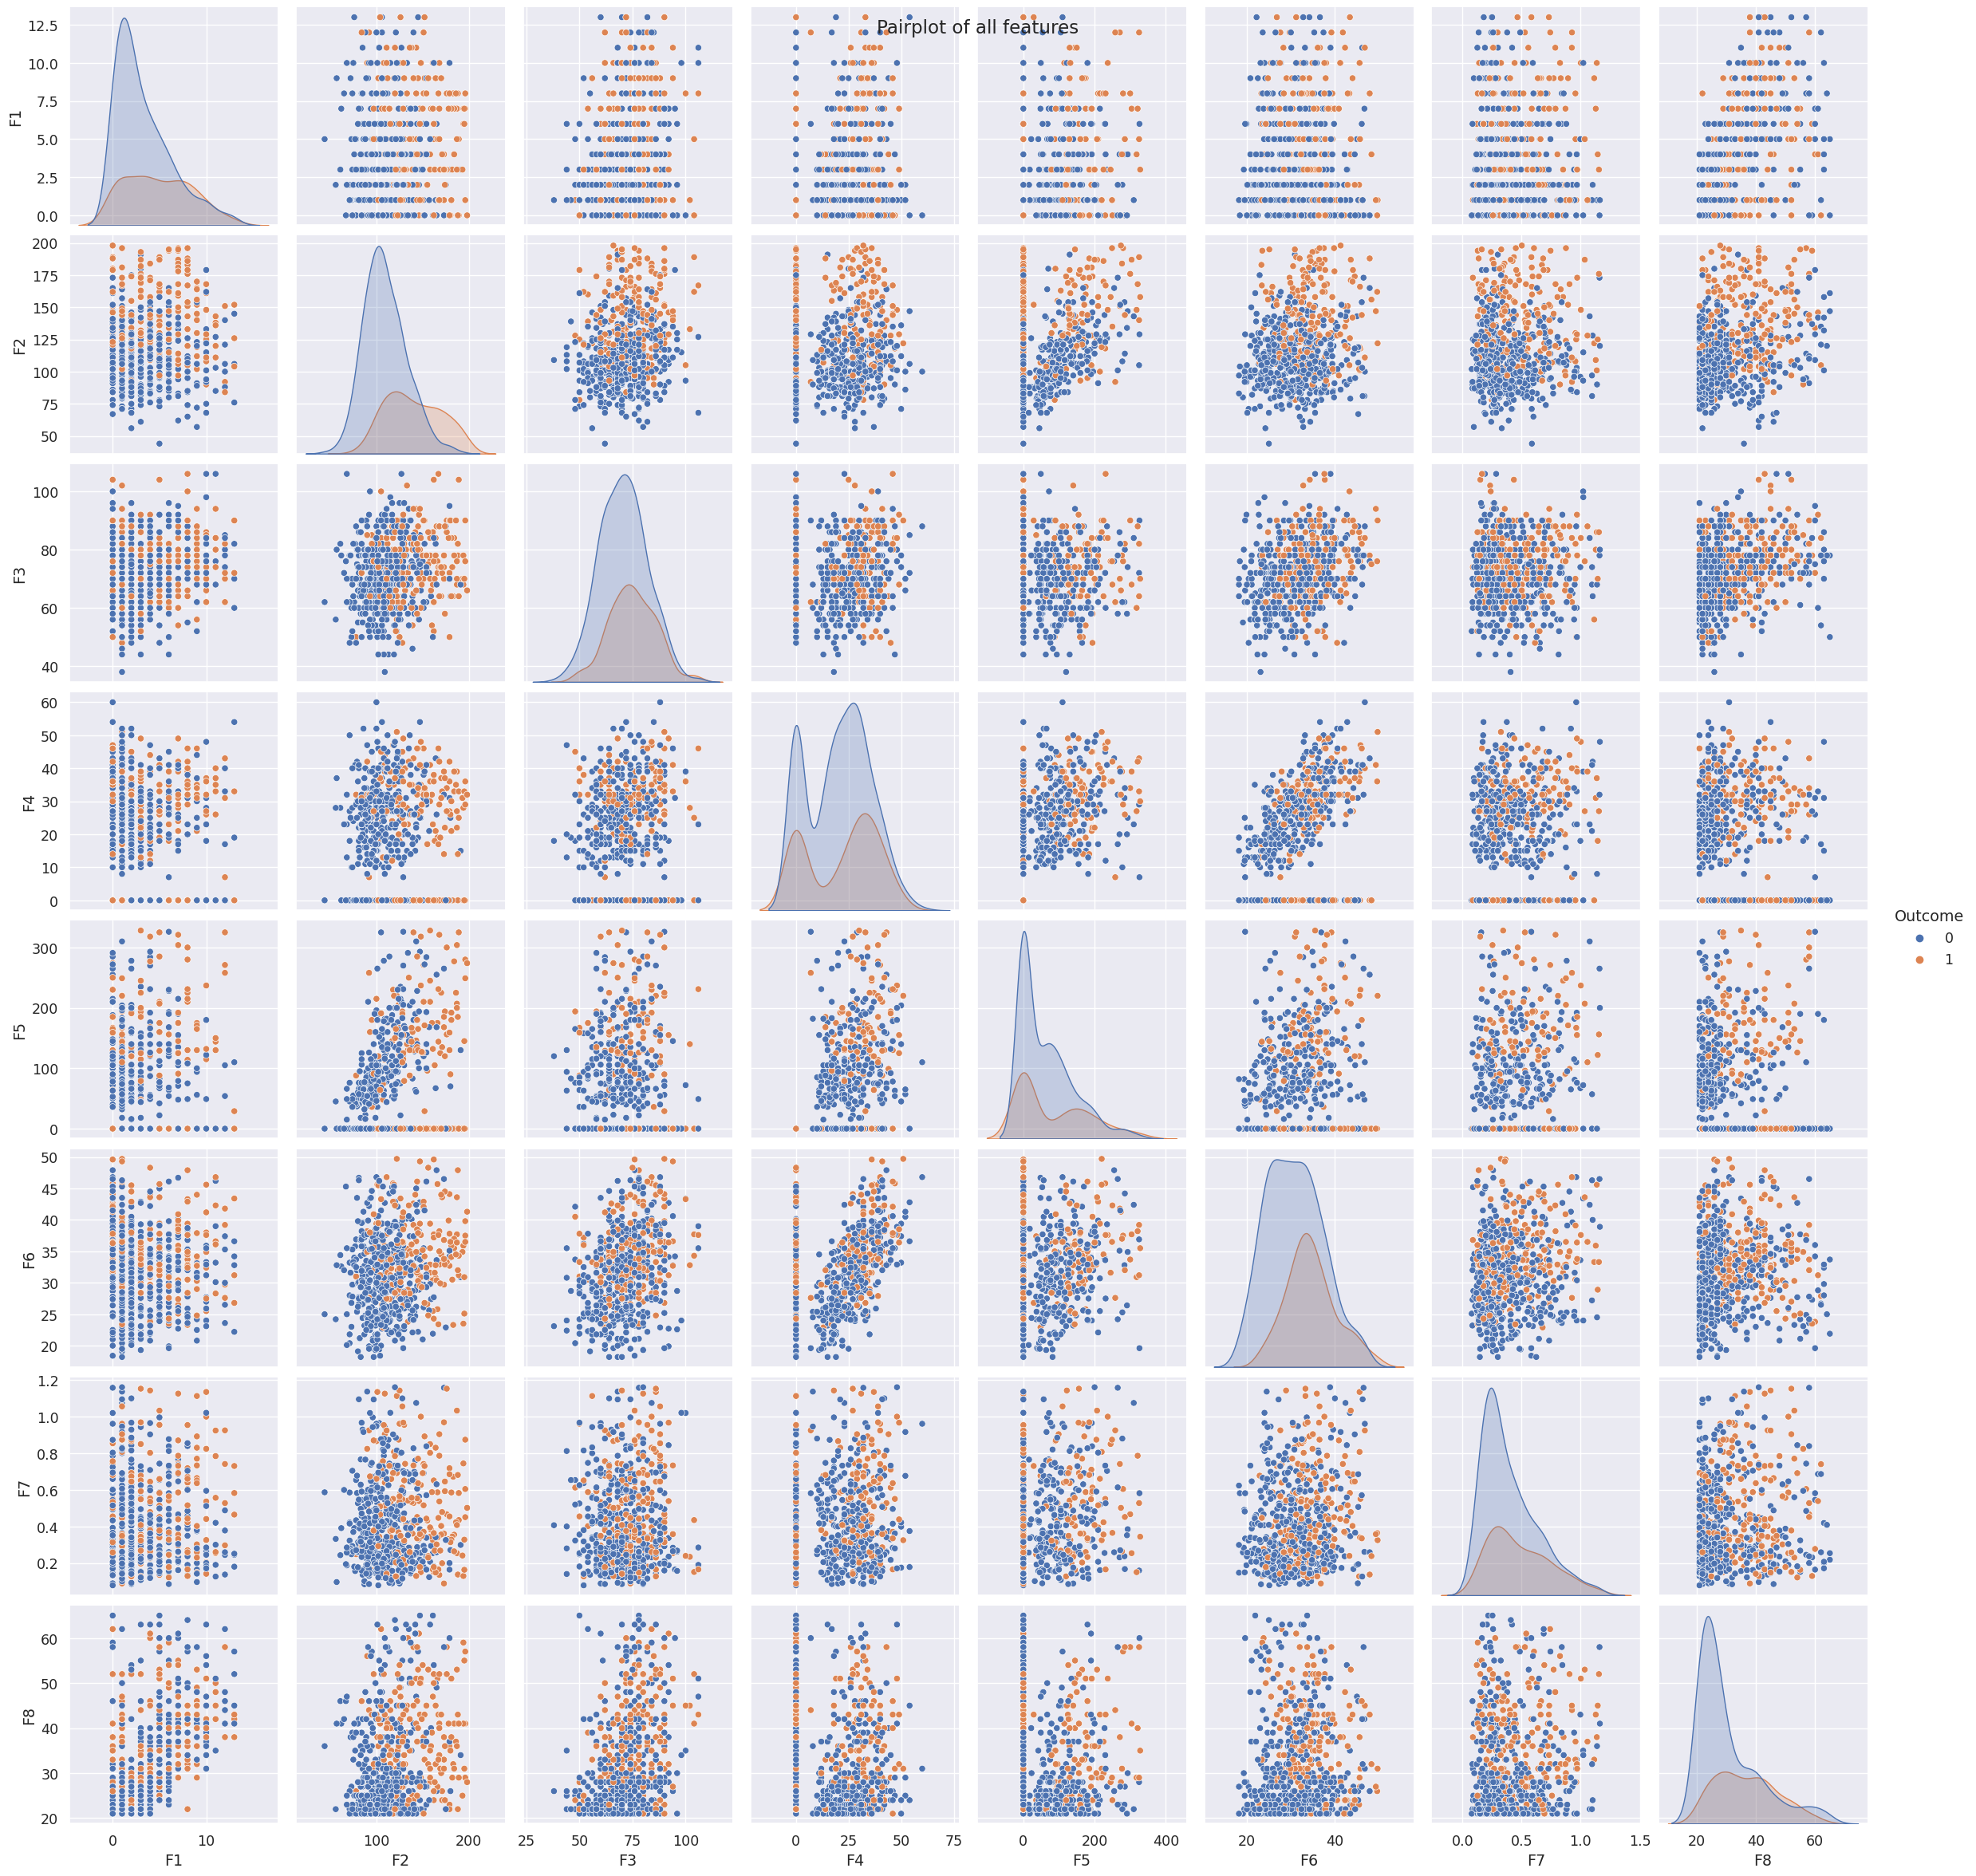

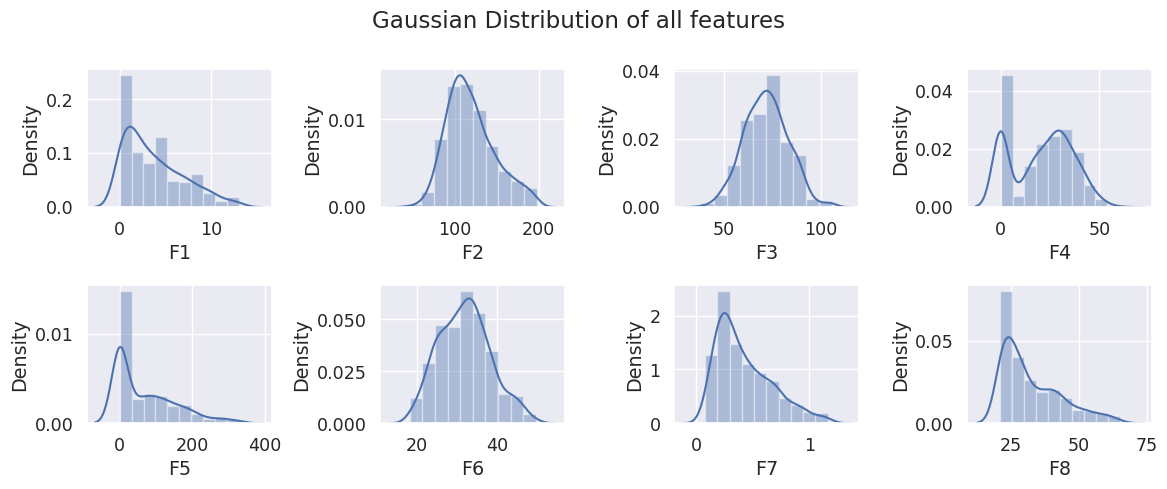

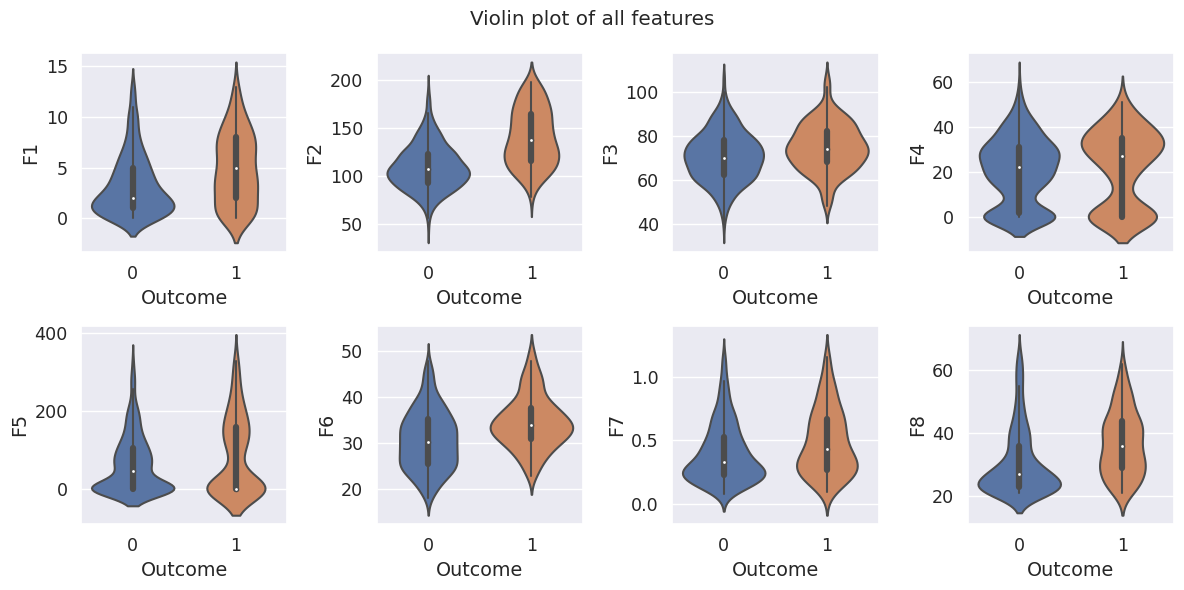

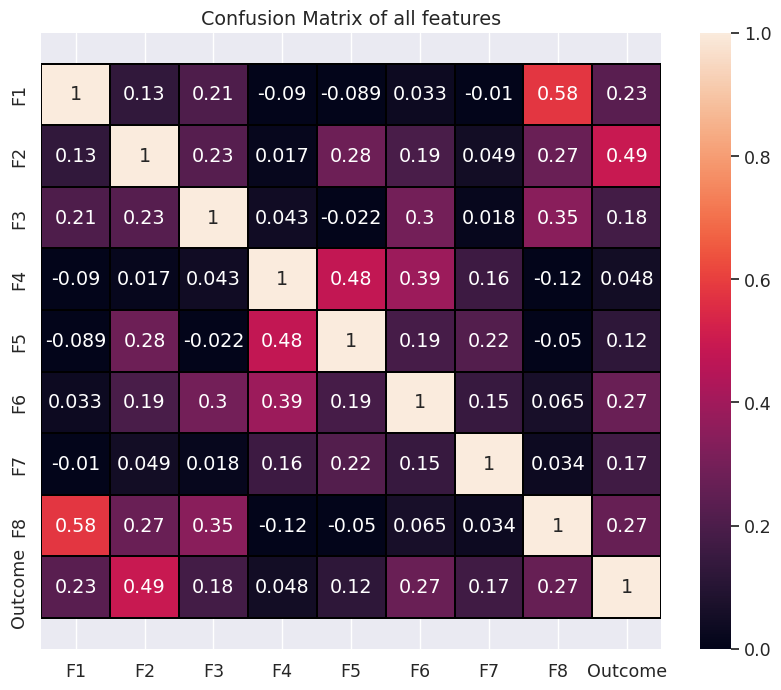

In [ ]:
data_plot (data,
          Pair_plot=True,
          Dist_Plot=True,
          Plot_violinplot=True,
          Plot_confusionMatrix=True,
          box_Gaussian=False)

## **Metrics**

In [ ]:
def metrics (y_true, y_pred, probas_):

  points=n_dots*'-'
  print(points)

  fpr, tpr, thresholds = roc_curve(y_true, probas_[:, 1])
  tprs.append(interp(mean_fpr, fpr, tpr))
  tprs[-1][0] = 0.0
  roc_auc = auc(fpr, tpr)
  print("Detailed classification report for current fold:")
  print()
  print(classification_report(y_true, y_pred))
  print()
  print("Area Under ROC (AUC): {}".format(roc_auc))
  print()
  print('Confusion Matrix for current fold: ')
  print(confusion_matrix(y_true, y_pred))
  print()
  print("Accuracy for Current Fold: {}".format(accuracy_score(y_true, y_pred)))
  print()
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

  return  tn, fp, fn, tp, roc_auc, fpr, tpr


def average_ROC(mean_fpr,tprs,aucs,TP,TN,FP,FN):


  sen = (np.sum(TP))/(np.sum(TP)+np.sum(FN))
  spe = (np.sum(TN))/(np.sum(TN)+np.sum(FP))

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
 
  mean_auc = np.mean(aucs)
  std_auc = np.std(aucs)

  ax = plt.axes()
  ax.grid(color='lightgray', linestyle='-', linewidth=.5)
  ax.set_facecolor("white")
  
  ax.spines['bottom'].set_color('#000000')
  ax.spines['top'].set_color('#000000') 
  ax.spines['right'].set_color('#000000')
  ax.spines['left'].set_color('#000000')

  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Avg. ROC (AUC (avg $\pm$ std) = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)
  
  plt.scatter((1-spe), sen, s=80, c='r', marker='x',)
  plt.scatter(0, sen, s=80, c='r', marker='x',)
  plt.scatter((1-spe),0, s=80, c='r', marker='x',)
  plt.axhline(y=sen, color='r', linestyle='--')
  plt.axvline(x=(1-spe), color='r', linestyle='--')
  plt.text((1-spe), 0.02, "FPR={:0.3f}".format((1-spe)))
  plt.text(0.009, sen+0.05, "TPR={:0.3f}".format(sen))

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='darkgray', alpha=0.5,
                  label=r'$\pm$ 1 Standard deviation')

  plt.xticks(np.arange(0.0, 1.01, step=0.1))
  plt.yticks(np.arange(0.0, 1.01, step=0.1))
  left=0.0
  right=1.0
  plt.xlim(left, right)
  plt.ylim(left, right)
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.legend(loc="lower right")
  plt.show()

def plot_Current_ROC(fpr,tpr,iterator,roc_auc):

  plt.plot(fpr,
          
          tpr,
          alpha=0.35,
          linewidth=1)

   
def creat_Model (classifier, X_Train, Y_Train, tuned_parameters, verbose):

  clf = GridSearchCV(classifier,
                    tuned_parameters,
                    verbose=verbose,
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1)
  clf.fit(X_Train, Y_Train)
  return clf

def average_performance(aucs,Accuracy,TP,TN,FP,FN): 

  print()
  n_dotsav=(n_dots-len('Average'))//2
    
  print('-'*n_dotsav+'Average'+'-'*n_dotsav)
  print("AUC (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(aucs),np.std(aucs)))
  print("Accuracy (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(Accuracy),np.std(Accuracy)))
  cm = [[int(np.mean(TP)), int(np.mean(FP))],[int(np.mean(FN)), int(np.mean(TN))]]
  print ('Avg. CM is '+str(cm))
  cm = [[int(np.sum(TP)), int(np.sum(FP))],[int(np.sum(FN)), int(np.sum(TN))]]
  print ('Total for all folds CM is '+str(cm))
  re_auc=str(round(np.mean(aucs), 3))+'+/-'+str(round(np.std(aucs),3))
  all_clf_res.append(re_auc)

### KNN **analyzing**

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        88
           1       0.69      0.45      0.55        40

    accuracy                           0.77       128
   macro avg       0.74      0.68      0.69       128
weighted avg       0.76      0.77      0.75       128


Area Under ROC (AUC): 0.8191761363636363

Confusion Matrix for current fold: 
[[80  8]
 [22 18]]

Accuracy for Current Fold: 0.765625

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        87
           1       0.82      0.57      0.68        40

    accuracy                           0.83       127
   macro avg       0.82      0.76      0.78       127
weighted avg       0.83      0.83      0.82       127


Area Un

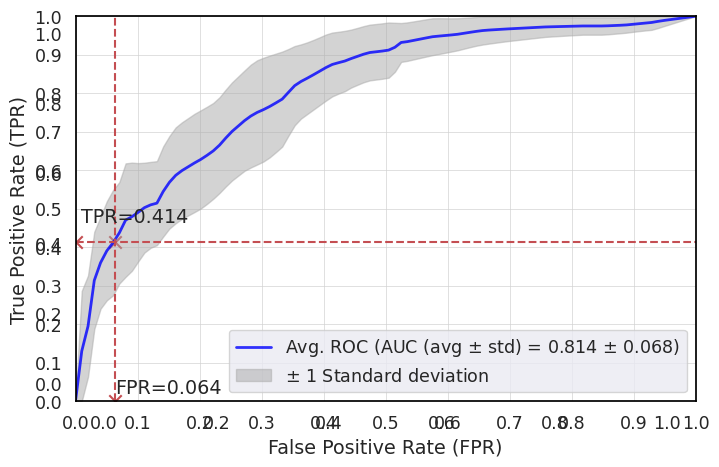


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.814 +/- 0.068
Accuracy (Avg. +/- Std.) is  0.774 +/- 0.040
Avg. CM is [[16, 5], [23, 82]]
Total for all folds CM is [[82, 28], [116, 410]]


In [ ]:
Accuracy = []                                                               
FP = []                                                                      
TN = []                                                                      
FN = []                                                                      
TP = []                                                                      
tprs = []                                                                   
aucs_kNN = []                                                               
iterator=0
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))

for train_index, test_index in kf.split(X_Data,Y_Lavel):                    
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]             
    n_neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49]
    leaf_size = [5,10,15,20,25,30,35,40,45,50]
    Distance = [1,2]


    tuned_parameters = [ {'n_neighbors': n_neighbors,                        
                        'algorithm' : ['brute'],
                        'p':Distance},

                         {'n_neighbors': n_neighbors, 
                        'algorithm' : ['ball_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance},

                        {'n_neighbors': n_neighbors, 
                        'algorithm' : ['kd_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance}]

    clf = creat_Model (classifier = KNeighborsClassifier(),                     
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)

    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,               
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))                                     
    tprs[-1][0] = 0.0
    aucs_kNN.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                                 
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_kNN,TP,TN,FP,FN)                                 
average_performance(aucs_kNN,Accuracy,TP,TN,FP,FN)                              

## **Decision** **Tree** **classifier** **analyzing**

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        88
           1       0.60      0.53      0.56        40

    accuracy                           0.74       128
   macro avg       0.70      0.68      0.69       128
weighted avg       0.73      0.74      0.74       128


Area Under ROC (AUC): 0.7322443181818181

Confusion Matrix for current fold: 
[[74 14]
 [19 21]]

Accuracy for Current Fold: 0.7421875

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        87
           1       0.82      0.57      0.68        40

    accuracy                           0.83       127
   macro avg       0.82      0.76      0.78       127
weighted avg       0.83      0.83      0.82       127


Area U

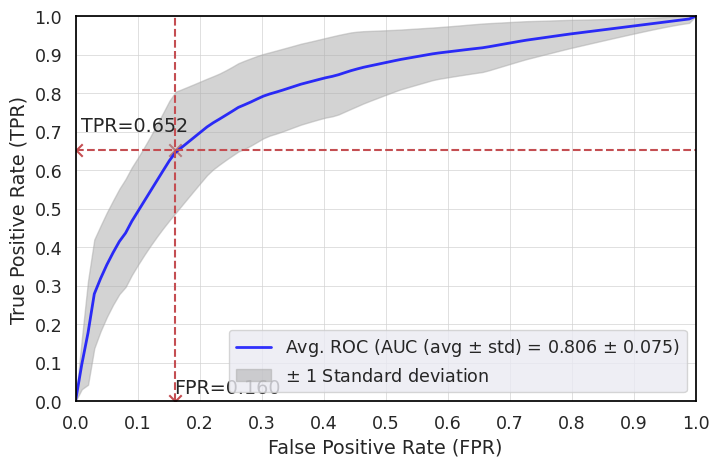


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.806 +/- 0.075
Accuracy (Avg. +/- Std.) is  0.782 +/- 0.048
Avg. CM is [[25, 14], [13, 73]]
Total for all folds CM is [[129, 70], [69, 368]]


In [ ]:
Accuracy = []                                                               
FP = []                                                                     
TN = []                                                                     
FN = []                                                                     
TP = []                                                                      
tprs = []                                                                    
aucs_Tree = []                                                               
iterator=0
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))

for train_index, test_index in kf.split(X_Data,Y_Lavel):
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]

                                                                           

    tuned_parameters = {'criterion': ['gini','entropy'],
                       'splitter': ['best'],
                       'min_samples_split':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                       'min_samples_leaf': [1,2,3,4,5] }

    clf = creat_Model (classifier = DecisionTreeClassifier( random_state=random_initializer),
                      X_Train = X_Train,                                    
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)

    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,          
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_Tree.append(roc_auc)                                               
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_Tree,TP,TN,FP,FN)                            
average_performance(aucs_Tree,Accuracy,TP,TN,FP,FN)

# Random forest

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        88
           1       0.56      0.60      0.58        40

    accuracy                           0.73       128
   macro avg       0.68      0.69      0.69       128
weighted avg       0.73      0.73      0.73       128


Area Under ROC (AUC): 0.7647727272727273

Confusion Matrix for current fold: 
[[69 19]
 [16 24]]

Accuracy for Current Fold: 0.7265625

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        87
           1       0.80      0.60      0.69        40

    accuracy                           0.83       127
   macro avg       0.82      0.77      0.78       127
weighted avg       0.82      0.83      0.82       127


Area U

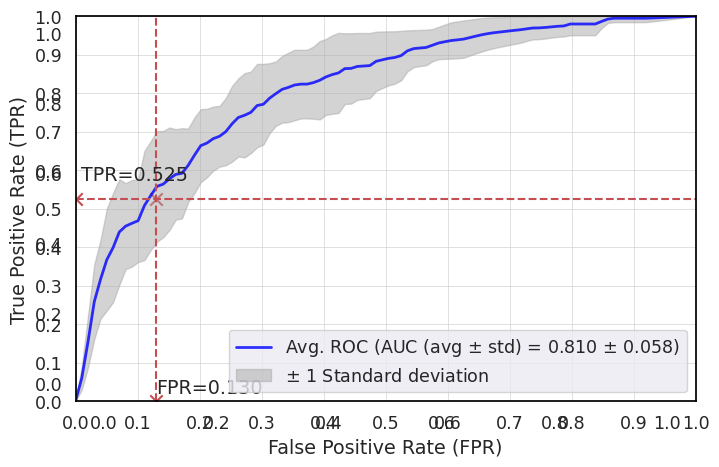


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.810 +/- 0.058
Accuracy (Avg. +/- Std.) is  0.763 +/- 0.045
Avg. CM is [[20, 11], [18, 76]]
Total for all folds CM is [[104, 57], [94, 381]]


In [ ]:
Accuracy = []                                                                 
FP = []                                                                      
TN = []                                                                      
FN = []                                                                      
TP = []                                                                      
tprs = []                                                                    
aucs_Forest = []                                                             # for store the values of auc of Random Forest model
iterator=0
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))

for train_index, test_index in kf.split(X_Data,Y_Lavel):                     
#   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              

    # parameters of Random Forest model
    tuned_parameters = {'criterion': ['gini','entropy']}

    clf = creat_Model (classifier = RandomForestClassifier( random_state=random_initializer),
                      X_Train = X_Train,                                      
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)

    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,              
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_Forest.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                               
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_Forest,TP,TN,FP,FN)                            
average_performance(aucs_Forest,Accuracy,TP,TN,FP,FN)                         

## **Adaboost analyzing**

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        88
           1       0.60      0.68      0.64        40

    accuracy                           0.76       128
   macro avg       0.72      0.74      0.73       128
weighted avg       0.77      0.76      0.76       128


Area Under ROC (AUC): 0.8133522727272728

Confusion Matrix for current fold: 
[[70 18]
 [13 27]]

Accuracy for Current Fold: 0.7578125

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        87
           1       0.83      0.60      0.70        40

    accuracy                           0.83       127
   macro avg       0.83      0.77      0.79       127
weighted avg       0.83      0.83      0.83       127


Area U

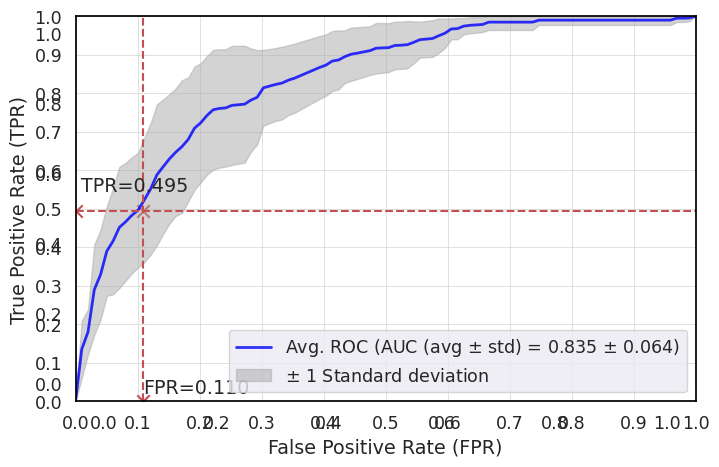


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.835 +/- 0.064
Accuracy (Avg. +/- Std.) is  0.767 +/- 0.048
Avg. CM is [[19, 9], [20, 78]]
Total for all folds CM is [[98, 48], [100, 390]]


In [ ]:
Accuracy = []                                                                
FP = []                                                                     
TN = []                                                                      
FN = []                                                                      
TP = []                                                                      
tprs = []                                                                   
aucs_aBoost = []                                                            
iterator=0

mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))


for train_index, test_index in kf.split(X_Data,Y_Lavel):                     
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              

    tuned_parameters = { 'algorithm': ['SAMME','SAMME.R'],
                       'learning_rate':[0.1,0.5,1.0],
                       'n_estimators': [10,50,100,200]}

    
    clf = creat_Model (classifier = AdaBoostClassifier( random_state=random_initializer),
                      X_Train = X_Train,                                      
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)
    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,             
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_aBoost.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                              
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_aBoost,TP,TN,FP,FN)                           
average_performance(aucs_aBoost,Accuracy,TP,TN,FP,FN)                        

# Naive Bayes

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        88
           1       0.63      0.65      0.64        40

    accuracy                           0.77       128
   macro avg       0.74      0.74      0.74       128
weighted avg       0.78      0.77      0.77       128


Area Under ROC (AUC): 0.8213068181818182

Confusion Matrix for current fold: 
[[73 15]
 [14 26]]

Accuracy for Current Fold: 0.7734375

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        87
           1       0.76      0.65      0.70        40

    accuracy                           0.83       127
   macro avg       0.81      0.78      0.79       127
weighted avg       0.82      0.83      0.82       127


Area U

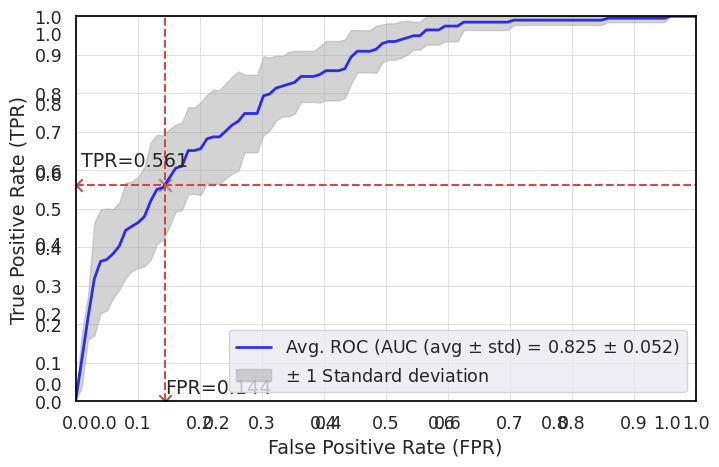


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.825 +/- 0.052
Accuracy (Avg. +/- Std.) is  0.764 +/- 0.038
Avg. CM is [[22, 12], [17, 75]]
Total for all folds CM is [[111, 63], [87, 375]]


In [ ]:
Accuracy = []                                                                 
FP = []                                                                       
TN = []                                                                      
FN = []                                                                      
TP = []                                                                      
tprs = []                                                                    
aucs_NB = []                                                                 
iterator=0

mean_fpr = np.linspace(0, 1, 100) 
fig = plt.figure(figsize=(8, 5))


for train_index, test_index in kf.split(X_Data,Y_Lavel):                     
#   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              

    var_smoothing = [1e-01,
                    1e-02,
                    1e-03,
                    1e-04,
                    1e-05,
                    1e-06,
                    1e-07,
                    1e-08,
                    1e-09,
                    1e-10,
                    1e-11,
                    1e-12]

    tuned_parameters = [{'var_smoothing': var_smoothing}]

   
    clf = creat_Model (classifier = GaussianNB(),                             
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)
    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,             
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_NB.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                               
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
average_ROC(mean_fpr,tprs,aucs_NB,TP,TN,FP,FN)                               
average_performance(aucs_NB,Accuracy,TP,TN,FP,FN)                            

## **XGBoost analyzing**

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        88
           1       0.62      0.62      0.62        40

    accuracy                           0.77       128
   macro avg       0.73      0.73      0.73       128
weighted avg       0.77      0.77      0.77       128


Area Under ROC (AUC): 0.7981534090909091

Confusion Matrix for current fold: 
[[73 15]
 [15 25]]

Accuracy for Current Fold: 0.765625

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        87
           1       0.83      0.62      0.71        40

    accuracy                           0.84       127
   macro avg       0.84      0.78      0.80       127
weighted avg       0.84      0.84      0.84       127


Area Un

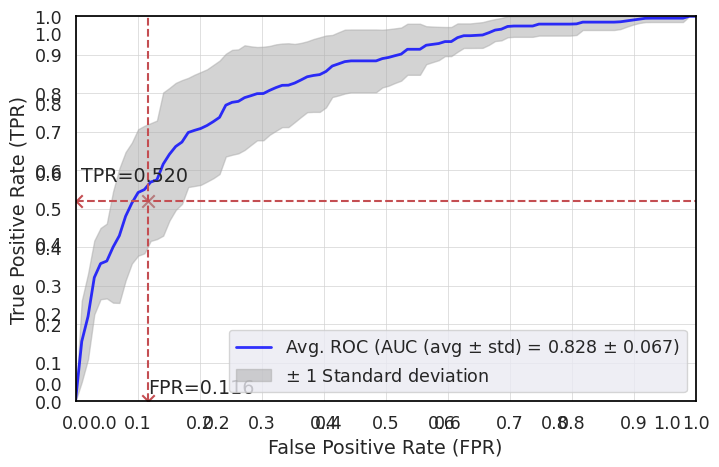


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.828 +/- 0.067
Accuracy (Avg. +/- Std.) is  0.770 +/- 0.046
Avg. CM is [[20, 10], [19, 77]]
Total for all folds CM is [[103, 51], [95, 387]]
Sensitivity (Avg. +/- Std.) is  0.520 +/- 0.125
Specificity (Avg. +/- Std.) is  0.884 +/- 0.039
Precision (Avg. +/- Std.) is  0.667 +/- 0.093
FOR (Avg. +/- Std.) is  0.195 +/- 0.040
DOR (Avg. +/- Std.) is  11.199 +/- 8.446


In [ ]:
Accuracy = []                                                                
FP = []                                                                     
TN = []                                                                      
FN = []                                                                     
TP = []                                                                      
tprs = []                                                                   
aucs_xboost = []                                                                
sn = []                                                                      
sp = []                                                                      
pr = []                                                                     
FOR = []                                                                    
DOR = []                                                                     
iterator=0
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))


for train_index, test_index in kf.split(X_Data,Y_Lavel):                     
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              
    tuned_parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.5, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

    clf = creat_Model (classifier = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'error', random_state=random_initializer),
                      X_Train = X_Train,                                       
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)
    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,               
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_xboost.append(roc_auc)
    plot_Current_ROC(fpr,tpr,iterator,roc_auc)                                 
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
    sn.append(tp/(tp+fn))
    sp.append(tn/(fp+tn))
    pr.append(tp/(tp+fp))
    FOR.append(fn/(tn+fn))
    DOR.append((tp*tn)/(fp*fn))

average_ROC(mean_fpr,tprs,aucs_xboost,TP,TN,FP,FN)                             
average_performance(aucs_xboost,Accuracy,TP,TN,FP,FN)                          
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))

## **Ensembler**

In [ ]:
def Ensembler(n_model, X_Train, Y_Train, X_Test, Y_Test, weight):
    tuned_parameters_ab = { 'algorithm': ['SAMME','SAMME.R'],        
                   'learning_rate':[0.1,0.5,1.0],
                   'n_estimators': [10,50,100,200]}

    clf_ab = creat_Model (classifier = AdaBoostClassifier(random_state=random_initializer),
                  X_Train = X_Train,                                              
                  Y_Train = Y_Train,
                  tuned_parameters = tuned_parameters_ab,
                  verbose=0)
    
    

    tuned_parameters_xb = {                                         
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.5, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

        
    clf_xb = creat_Model (classifier = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'error',random_state=random_initializer),
                      X_Train = X_Train,                             
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_xb,
                      verbose=0)
    tuned_parameters_dt = {'criterion': ['gini','entropy'],          
                       'splitter': ['best'],
                       'min_samples_split':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                       'min_samples_leaf': [1,2,3,4,5] }

    clf_dt = creat_Model (classifier = DecisionTreeClassifier(random_state=random_initializer),
                      X_Train = X_Train,                            
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_dt,
                      verbose=0)
    n_neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49]
    leaf_size = [5,10,15,20,25,30,35,40,45,50]
    Distance = [1,2]
                                                                      
    tuned_parameters_knn = [ {'n_neighbors': n_neighbors, 
                        'algorithm' : ['brute'],
                        'p':Distance},
                         
                         {'n_neighbors': n_neighbors, 
                        'algorithm' : ['ball_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance},
                          
                        {'n_neighbors': n_neighbors, 
                        'algorithm' : ['kd_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance}]

    clf_knn = creat_Model (classifier = KNeighborsClassifier(),               
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_knn,
                      verbose=0)
    tuned_parameters_rf = {'criterion': ['gini','entropy']}          # define parameters of RandomForestClassifier

    clf_rf = creat_Model (classifier = RandomForestClassifier(random_state=random_initializer),
                      X_Train = X_Train,                             #create model with RandomForest  classifier with utility function 
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_rf,
                      verbose=0)
    var_smoothing = [1e-01,
                    1e-02,
                    1e-03,
                    1e-04,
                    1e-05,
                    1e-06,
                    1e-07,
                    1e-08,
                    1e-09,
                    1e-10,
                    1e-11,
                    1e-12]

    tuned_parameters_nb = [{'var_smoothing': var_smoothing}]         # define parameters of Naive Bais

    clf_nb = creat_Model (classifier = GaussianNB(),                 #create model with Naive Bais  classifier with utility function 
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters_nb,
                      verbose=0)
    
    
    if weight == 'None':                                             
        if n_model == 2:                                              
            model = VotingClassifier([('ab', clf_ab), 
                                      ('xb', clf_xb)], 
                                     voting='soft')
            model.fit(X_Train,Y_Train)
            return model 
        if n_model == 3:                                                                          
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt)], 
                                     voting='soft')
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 4:                                               #Using 4 best model we create ensembled model with soft voting    
            model = VotingClassifier([('ab', clf_ab), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf)], 
                                     voting='soft')
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 5:                                               #Using 5 best model we create ensembled model with soft voting    
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf),
                                      ('nb',clf_nb)], 
                                     voting='soft')
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 6:                                               #Using 6 best model we create ensembled model with soft voting    
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf),
                                      ('nb',clf_nb),
                                      ('ab',clf_ab)], 
                                     voting='soft')
            model.fit(X_Train,Y_Train)
            return model
        
    if weight == 'accuracy':
        if n_model == 2:                                               #Using 6 best model we create ensembled model with soft voting   
            model = VotingClassifier([('ab', clf_ab), 
                                      ('xb', clf_xb)], 
                                     voting='soft',
                                     weights=[accuracy_score(Y_Test, clf_ab.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_xb.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model 
        if n_model == 3:                                               #Using 6 best model we create ensembled model with soft voting    
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt)], 
                                     voting='soft',
                                     weights=[accuracy_score(Y_Test, clf_knn.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_xb.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_dt.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 4:                                               #Using 6 best model we create ensembled model with soft voting    
            model = VotingClassifier([('ab', clf_ab), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf)], 
                                     voting='soft',
                                     weights=[accuracy_score(Y_Test, clf_ab.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_xb.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_dt.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_rf.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 5:                                               #Using 6 best model we create ensembled model with soft voting    
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf),
                                      ('nb',clf_nb)], 
                                     voting='soft',
                                     weights=[accuracy_score(Y_Test, clf_knn.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_xb.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_dt.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_rf.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_nb.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 6:                                               #Using 6 best model we create ensembled model with soft voting    
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf),
                                      ('nb',clf_nb),
                                      ('ab',clf_ab)], 
                                     voting='soft',
                                     weights=[accuracy_score(Y_Test, clf_knn.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_xb.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_dt.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_rf.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_nb.predict(X_Test)),
                                              accuracy_score(Y_Test, clf_ab.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model
         
    
    if weight == 'auc':
        if n_model == 2:                                               #Using 2 best model we create ensembled model with soft voting    
            model = VotingClassifier([('ab', clf_ab), 
                                      ('xb', clf_xb)], 
                                     voting='soft',
                                     weights=[roc_auc_score(Y_Test, clf_ab.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_xb.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model 
        if n_model == 3:                                               #Using 3 best model we create ensembled model with soft voting    
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt)], 
                                     voting='soft',
                                     weights=[roc_auc_score(Y_Test, clf_knn.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_xb.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_dt.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 4:                                               #Using 4 best model we create ensembled model with soft voting    
            model = VotingClassifier([('ab', clf_ab), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf)], 
                                     voting='soft',
                                     weights=[roc_auc_score(Y_Test, clf_ab.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_xb.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_dt.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_rf.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 5:                                               #Using 5 best model we create ensembled model with soft voting    
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf),
                                      ('nb',clf_nb)], 
                                     voting='soft',
                                     weights=[roc_auc_score(Y_Test, clf_knn.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_xb.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_dt.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_rf.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_nb.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model
        if n_model == 6:                                               #Using 6 best model we create ensembled model with soft voting    
            model = VotingClassifier([('knn', clf_knn), 
                                      ('xb', clf_xb),
                                      ('dt',clf_dt),
                                      ('rf',clf_rf),
                                      ('nb',clf_nb),
                                      ('ab',clf_ab)], 
                                     voting='soft',
                                     weights=[roc_auc_score(Y_Test, clf_knn.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_xb.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_dt.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_rf.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_nb.predict(X_Test)),
                                              roc_auc_score(Y_Test, clf_ab.predict(X_Test))])
            model.fit(X_Train,Y_Train)
            return model




model running with ensembling  ---  2  models..........
--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        88
           1       0.64      0.62      0.63        40

    accuracy                           0.77       128
   macro avg       0.74      0.73      0.73       128
weighted avg       0.77      0.77      0.77       128


Area Under ROC (AUC): 0.8099431818181817

Confusion Matrix for current fold: 
[[74 14]
 [15 25]]

Accuracy for Current Fold: 0.7734375

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        87
           1       0.83      0.62      0.71        40

    accuracy                           0.84       127
   macro avg       0.84      0.78      0.80       127
weight

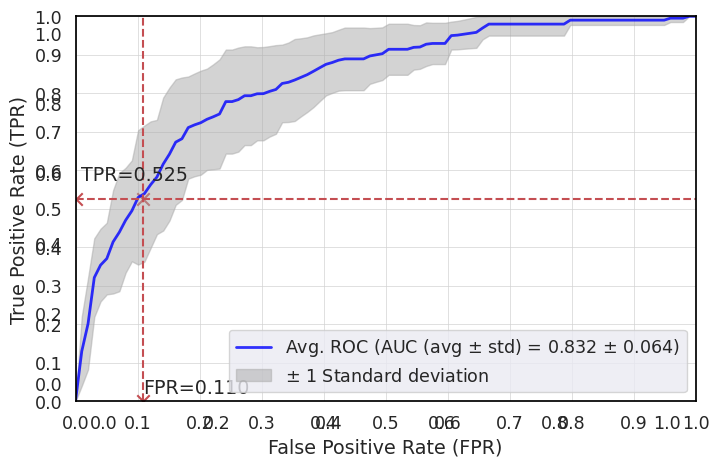


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.832 +/- 0.064
Accuracy (Avg. +/- Std.) is  0.777 +/- 0.044
Avg. CM is [[20, 9], [18, 78]]
Total for all folds CM is [[104, 48], [94, 390]]
Sensitivity (Avg. +/- Std.) is  0.525 +/- 0.119
Specificity (Avg. +/- Std.) is  0.890 +/- 0.037
Precision (Avg. +/- Std.) is  0.684 +/- 0.087
FOR (Avg. +/- Std.) is  0.193 +/- 0.038
DOR (Avg. +/- Std.) is  11.854 +/- 8.213
model running with ensembling  ---  3  models..........
--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        88
           1       0.71      0.60      0.65        40

    accuracy                           0.80       128
   macro avg       0.77      0.74      0.75       128
weighted avg       0.79      0.80      0.79       128


Area Under ROC (AUC): 0.8025568181818182

Confusion Matrix for current fold:

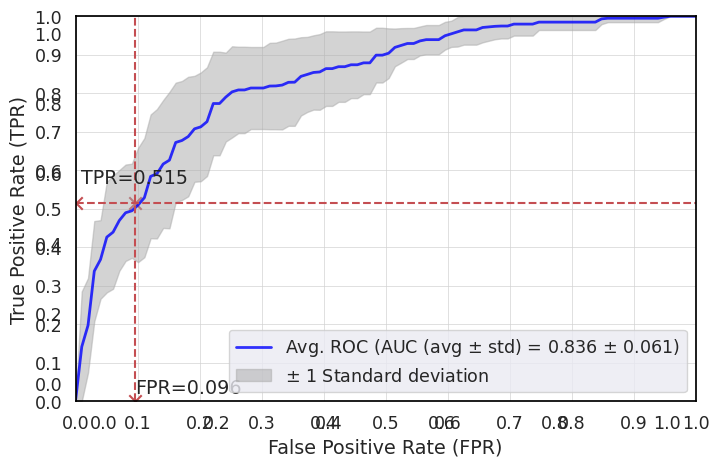


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.836 +/- 0.061
Accuracy (Avg. +/- Std.) is  0.783 +/- 0.045
Avg. CM is [[20, 8], [19, 79]]
Total for all folds CM is [[102, 42], [96, 396]]
Sensitivity (Avg. +/- Std.) is  0.515 +/- 0.112
Specificity (Avg. +/- Std.) is  0.904 +/- 0.026
Precision (Avg. +/- Std.) is  0.703 +/- 0.091
FOR (Avg. +/- Std.) is  0.194 +/- 0.038
DOR (Avg. +/- Std.) is  13.720 +/- 10.799
model running with ensembling  ---  4  models..........
--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.85      0.82      0.83        88
           1       0.63      0.68      0.65        40

    accuracy                           0.77       128
   macro avg       0.74      0.75      0.74       128
weighted avg       0.78      0.77      0.78       128


Area Under ROC (AUC): 0.7920454545454545

Confusion Matrix for current fold

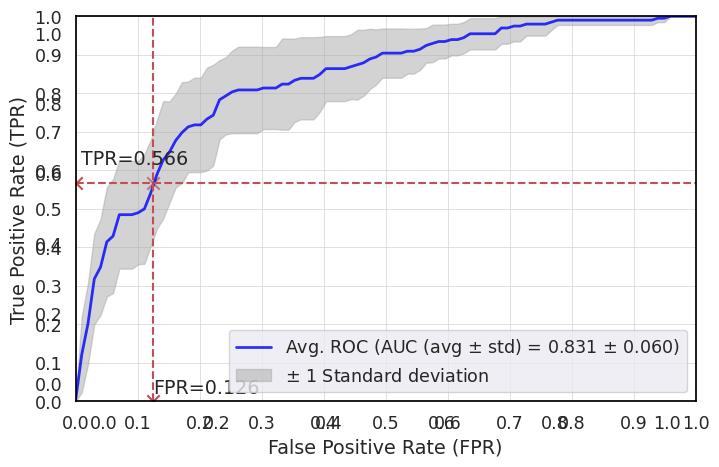


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.831 +/- 0.060
Accuracy (Avg. +/- Std.) is  0.778 +/- 0.046
Avg. CM is [[22, 11], [17, 76]]
Total for all folds CM is [[112, 55], [86, 383]]
Sensitivity (Avg. +/- Std.) is  0.565 +/- 0.111
Specificity (Avg. +/- Std.) is  0.875 +/- 0.041
Precision (Avg. +/- Std.) is  0.671 +/- 0.093
FOR (Avg. +/- Std.) is  0.182 +/- 0.039
DOR (Avg. +/- Std.) is  12.508 +/- 9.413
model running with ensembling  ---  5  models..........
--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        88
           1       0.62      0.62      0.62        40

    accuracy                           0.77       128
   macro avg       0.73      0.73      0.73       128
weighted avg       0.77      0.77      0.77       128


Area Under ROC (AUC): 0.8099431818181818

Confusion Matrix for current fold

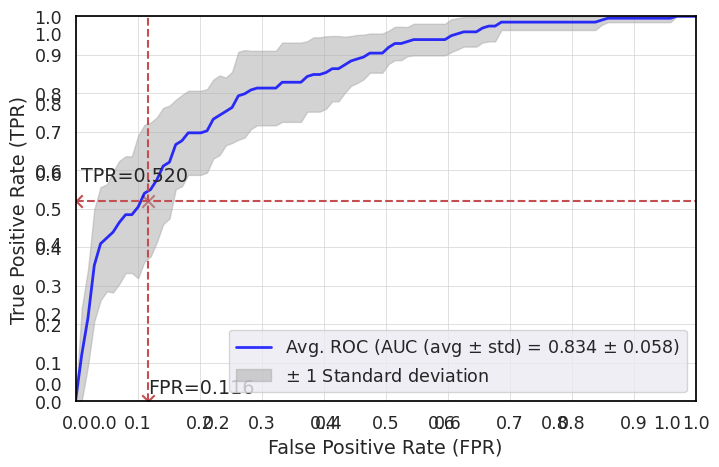


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.834 +/- 0.058
Accuracy (Avg. +/- Std.) is  0.770 +/- 0.051
Avg. CM is [[20, 10], [19, 77]]
Total for all folds CM is [[103, 51], [95, 387]]
Sensitivity (Avg. +/- Std.) is  0.520 +/- 0.116
Specificity (Avg. +/- Std.) is  0.884 +/- 0.042
Precision (Avg. +/- Std.) is  0.668 +/- 0.113
FOR (Avg. +/- Std.) is  0.196 +/- 0.040
DOR (Avg. +/- Std.) is  12.303 +/- 10.100
model running with ensembling  ---  6  models..........
--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        88
           1       0.64      0.62      0.63        40

    accuracy                           0.77       128
   macro avg       0.74      0.73      0.73       128
weighted avg       0.77      0.77      0.77       128


Area Under ROC (AUC): 0.8119318181818181

Confusion Matrix for current fol

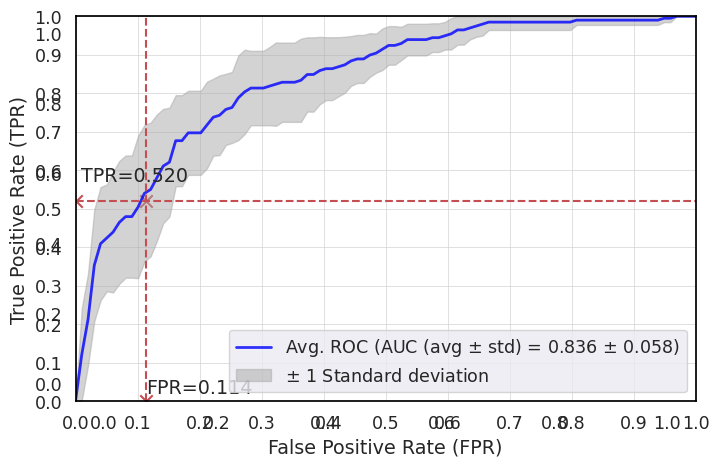


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.836 +/- 0.058
Accuracy (Avg. +/- Std.) is  0.772 +/- 0.051
Avg. CM is [[20, 10], [19, 77]]
Total for all folds CM is [[103, 50], [95, 388]]
Sensitivity (Avg. +/- Std.) is  0.520 +/- 0.116
Specificity (Avg. +/- Std.) is  0.886 +/- 0.039
Precision (Avg. +/- Std.) is  0.671 +/- 0.112
FOR (Avg. +/- Std.) is  0.195 +/- 0.040
DOR (Avg. +/- Std.) is  12.443 +/- 10.045


In [ ]:
file = open('output.txt','w') 
file.write('\n') 

for i in range(2,7):
    Accuracy = []                                                                 
    FP = []                                                                      
    TN = []                                                                      
    FN = []                                                                     
    TP = []                                                                      
    tprs = []                                                                    
    aucs_ens = []                                                               
    sn = []                                                                       
    sp = []                                                                      
    pr = []                                                                     
    FOR = []                                                                     
    DOR = []                                                                    
    iterator=0
    mean_fpr = np.linspace(0, 1, 100)
    fig = plt.figure(figsize=(8, 5))

    print('model running with ensembling  ---  '+str(i )+'  models..........')

    for train_index, test_index in kf.split(X_Data,Y_Lavel):                    
        X_Train, X_Test = X_Data[train_index], X_Data[test_index]               
        Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]             
        clf = Ensembler( i, X_Train, Y_Train, X_Test, Y_Test, 'None')           

        tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,   
                                                    y_pred = clf.predict(X_Test),
                                                    probas_ = clf.predict_proba(X_Test))
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs_ens.append(roc_auc)
        plot_Current_ROC (fpr,tpr,iterator,roc_auc)                            
        iterator += 1
        TN.append(tn)
        FP.append(fp)
        FN.append(fn)
        TP.append(tp)
        Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
        sn.append(tp/(tp+fn))
        sp.append(tn/(fp+tn))
        pr.append(tp/(tp+fp))
        FOR.append(fn/(tn+fn))
        DOR.append((tp*tn)/(fp*fn))
    
    average_ROC(mean_fpr,tprs,aucs_ens,TP,TN,FP,FN)                             
    average_performance(aucs_ens,Accuracy,TP,TN,FP,FN)  
    file.write(str(i)+'---------------'+all_clf_res[i-2])
    file.write('\n') 
    file.write('\n') 
    print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
    print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
    print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
    print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
    print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))


file.close()